# Connect to Mistral AI to get embeddings

[Mistral client-python setup](https://github.com/mistralai/client-python)
[Mistral Embeddings API](https://docs.mistral.ai/guides/embeddings/)

In [1]:
!pip install mistralai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 4.3 MB/s eta 0:00:00
  Using cached anyio-4.2.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.6/249.6 kB 5.1 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 kB 5.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)


### Testing

In [2]:
from mistralai.client import MistralClient

client = MistralClient(api_key="oppSIXvbwl8pQs6qFQ81afiNYks58C21")

embeddings_batch_response = client.embeddings(
    model="mistral-embed",
    input=["Apfel Tee.", "Fruechteemisch."],
)


In [16]:
print(embeddings_batch_response)

id='08700efa19ad42f4baa298f417b96199' object='list' data=[EmbeddingObject(object='embedding', embedding=[-0.03570556640625, -0.04388427734375, 0.05267333984375, -0.0207366943359375, 0.01071929931640625, 0.058135986328125, 0.0267181396484375, -0.007068634033203125, 0.0095367431640625, -0.047271728515625, -0.051544189453125, 0.08758544921875, -0.0184783935546875, -0.02886962890625, -0.007633209228515625, 0.04632568359375, 0.00531005859375, 0.024688720703125, -0.0038814544677734375, 0.004119873046875, -0.0140533447265625, -0.02606201171875, -0.068603515625, -0.00469970703125, 0.0036067962646484375, 0.019195556640625, -0.00047969818115234375, -0.0230865478515625, -0.048858642578125, 0.020172119140625, -0.034423828125, -0.0140533447265625, -0.00926971435546875, 0.040985107421875, 0.0268096923828125, -0.01477813720703125, 0.00836181640625, 0.01300811767578125, 0.03436279296875, -0.00789642333984375, -0.018280029296875, -0.005245208740234375, 0.029693603515625, -0.007228851318359375, -0.00044

In [17]:
print([embeddings_batch_response.data[0]])
print([embeddings_batch_response.data[1]])


[EmbeddingObject(object='embedding', embedding=[-0.03570556640625, -0.04388427734375, 0.05267333984375, -0.0207366943359375, 0.01071929931640625, 0.058135986328125, 0.0267181396484375, -0.007068634033203125, 0.0095367431640625, -0.047271728515625, -0.051544189453125, 0.08758544921875, -0.0184783935546875, -0.02886962890625, -0.007633209228515625, 0.04632568359375, 0.00531005859375, 0.024688720703125, -0.0038814544677734375, 0.004119873046875, -0.0140533447265625, -0.02606201171875, -0.068603515625, -0.00469970703125, 0.0036067962646484375, 0.019195556640625, -0.00047969818115234375, -0.0230865478515625, -0.048858642578125, 0.020172119140625, -0.034423828125, -0.0140533447265625, -0.00926971435546875, 0.040985107421875, 0.0268096923828125, -0.01477813720703125, 0.00836181640625, 0.01300811767578125, 0.03436279296875, -0.00789642333984375, -0.018280029296875, -0.005245208740234375, 0.029693603515625, -0.007228851318359375, -0.0004451274871826172, -0.04736328125, -0.004547119140625, -0.01

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

distance = euclidean_distances([embeddings_batch_response.data[0].embedding],
                               [embeddings_batch_response.data[1].embedding])

In [19]:
distance

array([[0.67489457]])

In [3]:
def get_text_embedding(input):
    embeddings_batch_response = client.embeddings(
        model="mistral-embed",
        input=input
    )
    return embeddings_batch_response.data[0].embedding

In [26]:
def test_embeddings(sentences, reference):
    embeddings = [get_text_embedding(t) for t in sentences]

    reference_embedding = get_text_embedding(reference)

    print('Reference: ', reference)
    for t, e in zip(sentences, embeddings):
        distance = euclidean_distances([e], [reference_embedding])
        
        print(t, distance)



In [27]:
sentences = [
    "A home without a cat — and a well-fed, well-petted and properly revered cat — may be a perfect home, perhaps, but how can it prove title?",
    "I think books are like people, in the sense that they'll turn up in your life when you most need them"
]

rewe_list = [
    "REWE Beste Wahl Sonnenmais Supersweet 140g",
    "REWE Beste Wahl Sonnenmais Supersweet 285g",
    "REWE Bio Sonnenmais 140g"
]
rewe_abbr = ["Sonnenmais REWE"]
test_embeddings(rewe_list, rewe_abbr)

Reference:  ['Sonnenmais REWE']
REWE Beste Wahl Sonnenmais Supersweet 140g [[0.50826454]]
REWE Beste Wahl Sonnenmais Supersweet 285g [[0.51197767]]
REWE Bio Sonnenmais 140g [[0.44214499]]


In [30]:
len(embeddings_batch_response.data[0].embedding)

1024

## Clean df

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('https://github.com/L480/rewe-price-data/releases/download/2024-02-08/bavaria.csv')

In [265]:
df

,name,brand,ean,price,grammage,category,sale,image
0,Salatgurke 1 Stück,NaN,20483302,0.99,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/0483303/24569873_di...
1,Avocado Hass essreif 1 Stück,NaN,8717428071131,0.99,1 Stück,Obst & Gemüse,True,https://img.rewe-static.de/0151854/25018105_di...
2,Bio Banane ca. 200g,REWE Bio,23376267,0.40,"1 Stück ca. 200 g (1 kg = 1,99 €)",Obst & Gemüse,False,https://img.rewe-static.de/1930502/30177546_di...
3,Lauchzwiebeln im Bund,NaN,20482404,0.99,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/0482404/31686352_di...
4,Apfel Pink Lady 1kg,NaN,8023666703001,3.69,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/1907459/23271229_di...
...,...,...,...,...,...,...,...,...
21955,Niederegger Nougat Knusper Waffel vegan 100g,Niederegger,4000161010210,3.95,"100g (1 kg = 39,50 €)",Vegane Vielfalt,False,https://img.rewe-static.de/7798112/37223456_di...
21956,Palapa Tortilla Chips Chili 450g,Palapa,4036573100638,3.59,"450g (1 kg = 7,98 €)",Vegane Vielfalt,False,https://img.rewe-static.de/0858772/25372457_di...
21957,Potpure Bio Maronen Kürbissuppe vegan 450g,Potpure,4260155024276,3.99,"450g (1 kg = 8,87 €)",Vegane Vielfalt,False,https://img.rewe-static.de/8099513/36175840_di...
21958,PowerBar Natural Protein Blueberry Nuts 40g,PowerBar,4029679669840,1.85,"40g (1 kg = 46,25 €)",Vegane Vielfalt,False,https://img.rewe-static.de/2421934/27709221_di...


In [266]:
df.category.unique()

array(['Obst & Gemüse', 'Babybedarf', 'Brot, Cerealien & Aufstriche',
       'Drogerie & Kosmetik', 'Fertiggerichte & Konserven',
       'Fleisch & Fisch', 'Getränke & Genussmittel', 'Haus & Freizeit',
       'International', 'Kaffee, Tee & Kakao', 'Käse, Eier & Molkerei',
       'Kochen & Backen', 'Küche & Haushalt', 'Öle, Soßen & Gewürze',
       'Regional', 'Süßes & Salziges', 'Tiefkühlkost', 'Tierbedarf',
       'Vegane Vielfalt'], dtype=object)

In [6]:
df_filtered = df[df.eval("category != 'Vegane Vielfalt' and category != 'Regional' and category != 'International'")]
df_filtered

,name,brand,ean,price,grammage,category,sale,image
0,Salatgurke 1 Stück,NaN,20483302,0.99,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/0483303/24569873_di...
1,Avocado Hass essreif 1 Stück,NaN,8717428071131,0.99,1 Stück,Obst & Gemüse,True,https://img.rewe-static.de/0151854/25018105_di...
2,Bio Banane ca. 200g,REWE Bio,23376267,0.40,"1 Stück ca. 200 g (1 kg = 1,99 €)",Obst & Gemüse,False,https://img.rewe-static.de/1930502/30177546_di...
3,Lauchzwiebeln im Bund,NaN,20482404,0.99,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/0482404/31686352_di...
4,Apfel Pink Lady 1kg,NaN,8023666703001,3.69,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/1907459/23271229_di...
...,...,...,...,...,...,...,...,...
21155,ja! Geniesser Menü verschiedene Sorten in Jell...,ja!,4337256583411,3.19,"15x100g (1 kg = 2,13 €)",Tierbedarf,False,https://img.rewe-static.de/7657120/38747854_di...
21156,ja! Saftige Brocken mit Geflügel 1240g,ja!,4337256476645,1.59,"1240g (1 kg = 1,28 €)",Tierbedarf,False,https://img.rewe-static.de/7180200/28889876_di...
21157,ja! Dental Snacks 7 Stück,ja!,4337256453059,0.79,"250g (1 kg = 3,16 €)",Tierbedarf,False,https://img.rewe-static.de/8765199/37975004_di...
21158,ja! Schlemmermahlzeit mit Herz und Geflügel 400g,ja!,4337256474382,0.79,"400g (1 kg = 1,98 €)",Tierbedarf,False,https://img.rewe-static.de/0873322/3159420_dig...


In [7]:
duplicated_names = df_filtered[df_filtered.name.duplicated()].name.tolist()

In [8]:
df_filtered[df_filtered.name.isin(duplicated_names)]

,name,brand,ean,price,grammage,category,sale,image
145,EatHappy Poké Bowl Lachs 410g,EatHappy,4260372062198,9.99,"410g (1 kg = 24,37 €)",Obst & Gemüse,False,https://img.rewe-static.de/8440216/31049029_di...
192,Tomaten getrocknet 100g,NaN,8011185010052,1.99,"100g (1 kg = 19,90 €)",Obst & Gemüse,False,https://img.rewe-static.de/8343334/30673204_di...
220,EatHappy Poké Bowl Veggie vegan 420g,EatHappy,4260372062174,8.99,"420g (1 kg = 21,40 €)",Obst & Gemüse,False,https://img.rewe-static.de/8495583/32386402_di...
282,Freche Freunde Bio Erdbeere Fruchtchips 12g,Freche Freunde,4260249140530,1.95,"12g (1 kg = 162,50 €)",Babybedarf,False,https://img.rewe-static.de/2388398/24940090_di...
305,Frosch Baby Spül-Reiniger 500ml,Frosch,4001499908347,2.99,"500ml (1 l = 5,98 €)",Babybedarf,False,https://img.rewe-static.de/1424118/23106188_di...
...,...,...,...,...,...,...,...,...
20240,REWE Beste Wahl Nuggets mit Sweet Chili & Süß-...,REWE Beste Wahl,4337256690195,2.29,300g,Tiefkühlkost,False,https://img.rewe-static.de/7648597/41568838_di...
20493,ZooRoyal Rind Plus Pur 400g,ZooRoyal,4337256382717,1.59,"400g (1 kg = 3,98 €)",Tierbedarf,False,https://img.rewe-static.de/8335496/31552979_di...
20734,ZooRoyal Rind Plus Multifleisch-Cocktail 400g,ZooRoyal,4337256380614,1.59,"400g (1 kg = 3,98 €)",Tierbedarf,False,https://img.rewe-static.de/8335399/31552849_di...
20743,ZooRoyal Rind Plus Pur 400g,ZooRoyal,4337256376587,1.79,"400g (1 kg = 4,48 €)",Tierbedarf,False,https://img.rewe-static.de/8374246/31552976_di...


In [9]:
df_duplicates = df_filtered[df_filtered.name.isin(duplicated_names)].groupby('name')[['name', 'category','ean','sale','brand','price','grammage']].nunique()
df_duplicates

,name,category,ean,sale,brand,price,grammage
name,,,,,,,
Adriatic Queen Sardinenpastete 95g,1,2,1,1,0,1,1
Alpro Soja-Drink Protein vegan 1l,1,1,2,1,1,2,1
Always Dailies Flexistyle Normal 54 Stück,1,1,2,1,1,1,1
Always Slipeinlagen Extra Protect Large 48 Stück,1,1,2,1,1,1,1
Always Slipeinlagen Extra Protect Long Plus 40 Stück,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...
ja! Fettarmer Joghurt mild Pfirsich-Mango 250g,1,1,1,1,1,1,1
ja! Kräuterbutter 120g,1,1,1,1,1,1,1
ja! Zahnstocher 450 Stück,1,2,1,1,1,1,1


Produkte, die in 2 Kategorien sind
- ganz raus
Produkte, die mit 2 EAN-Nummern geführt sind
- Eins behalten, Duplikat raus
Produkte 2 Preise
- Eins raus

In [10]:
# n of prosd w/ multiple cats
(df_filtered.groupby('name').category.nunique().sort_values() == 2).sum()

151

In [11]:
groupby_filtered = df_filtered.groupby('name').category.nunique().reset_index()
duplicated_names_multiple_categories = groupby_filtered[groupby_filtered.eval('category > 1')].name.tolist()
duplicated_names_multiple_categories

['Adriatic Queen Sardinenpastete 95g',
 'Ardealul Pate de Pui 100g',
 'Arte Tapas Pan Tostado Bruschetta Tomate 150g',
 'Babytime Baby Wattepads 60 Stück',
 'Bad Heilbrunner Arzneitee Nieren- und Blasentee 8 Stück',
 'Bad Heilbrunner Arzneitee Thymian Tee 11,2g, 8 Beutel',
 'Bamboo Garden Reispapier 150g',
 'Barebells Milkshake Banana Flavour laktosefrei 0,33l',
 'Barebells Soft Protein Bar Salted Peanut Caramel 55g',
 'Bebe Schaumbad & Dusche 500ml',
 'Bedford Hähnchen-Chili-Sticks 103g',
 'Beeck Feinster roter Heringssalat',
 "Ben & Jerry's Chocolate Chip Cookie Dough 170g",
 'BettaF!sh TU-NAH Aufstrich Natur vegan 130g',
 'Beyond Meat Beyond Burger vegan 226g',
 'Brigitta Kaffeefilter No. 2, 80 Stück',
 "Butcher's Beef Burger Patties Charolais 230g",
 "Butcher's Frische Jumbo Pommes Frites 700g",
 'Bübchen 2 in 1 Shampoo & Duschgel Wasch-Freunde 230ml',
 'Bübchen 3 in 1 Shampoo & Duschgel + Spülung Meereszauber 230ml',
 'Bübchen Baby Shampoo Sensitiv 200ml',
 'Bübchen Kinder Shampoo

In [273]:
len(duplicated_names_multiple_categories)

151

In [12]:
df_filtered[df_filtered.name.isin(duplicated_names_multiple_categories)].sort_values(by='name')


,name,brand,ean,price,grammage,category,sale,image
6783,Adriatic Queen Sardinenpastete 95g,NaN,3850160201017,1.29,"95g (1 kg = 13,58 €)",Fleisch & Fisch,False,https://img.rewe-static.de/7175556/31176032_di...
5553,Adriatic Queen Sardinenpastete 95g,NaN,3850160201017,1.29,"95g (1 kg = 13,58 €)",Fertiggerichte & Konserven,False,https://img.rewe-static.de/7175556/31176032_di...
1850,Ardealul Pate de Pui 100g,NaN,5941294000848,0.99,"100g (1 kg = 9,90 €)","Brot, Cerealien & Aufstriche",False,https://img.rewe-static.de/2174427/24356541_di...
5587,Ardealul Pate de Pui 100g,NaN,5941294000848,0.99,"100g (1 kg = 9,90 €)",Fertiggerichte & Konserven,False,https://img.rewe-static.de/2174427/24356541_di...
965,Arte Tapas Pan Tostado Bruschetta Tomate 150g,NaN,4004019075154,1.39,"150g (1 kg = 9,27 €)","Brot, Cerealien & Aufstriche",False,https://img.rewe-static.de/7792202/35899766_di...
...,...,...,...,...,...,...,...,...
7724,Wholey Bio Dragon Bowl 250g,Wholey,4260582960420,3.49,"250g (1 kg = 13,96 €)",Getränke & Genussmittel,False,https://img.rewe-static.de/8472465/32702548_di...
9951,Zenker 20 Kuchenkerzen + 12 Kerzenhalter,Zenker,4008033525053,4.79,1 Stück,Haus & Freizeit,False,https://img.rewe-static.de/2321354/29752015_di...
14694,Zenker 20 Kuchenkerzen + 12 Kerzenhalter,Zenker,4008033525053,4.79,1 Stück,Kochen & Backen,False,https://img.rewe-static.de/2321354/29752015_di...
3910,ja! Zahnstocher 450 Stück,ja!,4388860588675,1.79,450 Stück,Drogerie & Kosmetik,False,https://img.rewe-static.de/8100302/29611467_di...


In [275]:
df_filtered.shape

(19520, 8)

In [13]:
df_filtered = df_filtered[~df_filtered.name.isin(duplicated_names_multiple_categories)]

In [14]:
df_filtered

,name,brand,ean,price,grammage,category,sale,image
0,Salatgurke 1 Stück,NaN,20483302,0.99,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/0483303/24569873_di...
1,Avocado Hass essreif 1 Stück,NaN,8717428071131,0.99,1 Stück,Obst & Gemüse,True,https://img.rewe-static.de/0151854/25018105_di...
2,Bio Banane ca. 200g,REWE Bio,23376267,0.40,"1 Stück ca. 200 g (1 kg = 1,99 €)",Obst & Gemüse,False,https://img.rewe-static.de/1930502/30177546_di...
3,Lauchzwiebeln im Bund,NaN,20482404,0.99,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/0482404/31686352_di...
4,Apfel Pink Lady 1kg,NaN,8023666703001,3.69,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/1907459/23271229_di...
...,...,...,...,...,...,...,...,...
21155,ja! Geniesser Menü verschiedene Sorten in Jell...,ja!,4337256583411,3.19,"15x100g (1 kg = 2,13 €)",Tierbedarf,False,https://img.rewe-static.de/7657120/38747854_di...
21156,ja! Saftige Brocken mit Geflügel 1240g,ja!,4337256476645,1.59,"1240g (1 kg = 1,28 €)",Tierbedarf,False,https://img.rewe-static.de/7180200/28889876_di...
21157,ja! Dental Snacks 7 Stück,ja!,4337256453059,0.79,"250g (1 kg = 3,16 €)",Tierbedarf,False,https://img.rewe-static.de/8765199/37975004_di...
21158,ja! Schlemmermahlzeit mit Herz und Geflügel 400g,ja!,4337256474382,0.79,"400g (1 kg = 1,98 €)",Tierbedarf,False,https://img.rewe-static.de/0873322/3159420_dig...


In [15]:
df_filtered = df_filtered.drop_duplicates(subset='name')
df_filtered

,name,brand,ean,price,grammage,category,sale,image
0,Salatgurke 1 Stück,NaN,20483302,0.99,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/0483303/24569873_di...
1,Avocado Hass essreif 1 Stück,NaN,8717428071131,0.99,1 Stück,Obst & Gemüse,True,https://img.rewe-static.de/0151854/25018105_di...
2,Bio Banane ca. 200g,REWE Bio,23376267,0.40,"1 Stück ca. 200 g (1 kg = 1,99 €)",Obst & Gemüse,False,https://img.rewe-static.de/1930502/30177546_di...
3,Lauchzwiebeln im Bund,NaN,20482404,0.99,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/0482404/31686352_di...
4,Apfel Pink Lady 1kg,NaN,8023666703001,3.69,1 Stück,Obst & Gemüse,False,https://img.rewe-static.de/1907459/23271229_di...
...,...,...,...,...,...,...,...,...
21155,ja! Geniesser Menü verschiedene Sorten in Jell...,ja!,4337256583411,3.19,"15x100g (1 kg = 2,13 €)",Tierbedarf,False,https://img.rewe-static.de/7657120/38747854_di...
21156,ja! Saftige Brocken mit Geflügel 1240g,ja!,4337256476645,1.59,"1240g (1 kg = 1,28 €)",Tierbedarf,False,https://img.rewe-static.de/7180200/28889876_di...
21157,ja! Dental Snacks 7 Stück,ja!,4337256453059,0.79,"250g (1 kg = 3,16 €)",Tierbedarf,False,https://img.rewe-static.de/8765199/37975004_di...
21158,ja! Schlemmermahlzeit mit Herz und Geflügel 400g,ja!,4337256474382,0.79,"400g (1 kg = 1,98 €)",Tierbedarf,False,https://img.rewe-static.de/0873322/3159420_dig...


In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19121 entries, 0 to 21159
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      19121 non-null  object 
 1   brand     17817 non-null  object 
 2   ean       19121 non-null  int64  
 3   price     19121 non-null  float64
 4   grammage  19014 non-null  object 
 5   category  19121 non-null  object 
 6   sale      19121 non-null  bool   
 7   image     19121 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [17]:
df_filtered=df_filtered.drop(['brand', 'ean', 'grammage','sale','image'], axis=1)
df_filtered

,name,price,category
0,Salatgurke 1 Stück,0.99,Obst & Gemüse
1,Avocado Hass essreif 1 Stück,0.99,Obst & Gemüse
2,Bio Banane ca. 200g,0.40,Obst & Gemüse
3,Lauchzwiebeln im Bund,0.99,Obst & Gemüse
4,Apfel Pink Lady 1kg,3.69,Obst & Gemüse
...,...,...,...
21155,ja! Geniesser Menü verschiedene Sorten in Jell...,3.19,Tierbedarf
21156,ja! Saftige Brocken mit Geflügel 1240g,1.59,Tierbedarf
21157,ja! Dental Snacks 7 Stück,0.79,Tierbedarf
21158,ja! Schlemmermahlzeit mit Herz und Geflügel 400g,0.79,Tierbedarf


In [18]:
df_filtered=df_filtered.sort_values(by=['category','name']).reset_index(drop=True)
df_filtered

,name,price,category
0,Alete Abendbrei Bio Keksbrei 190g,1.29,Babybedarf
1,Alete Abendmahlzeit zum Trinken Mehrkorn-Getre...,1.99,Babybedarf
2,Alete Bio Apfel-Pfirsich mit Keks nach 4. Mona...,1.29,Babybedarf
3,Alete Bio Banane-Apfel mit Vollkorn-Getreide 190g,1.29,Babybedarf
4,Alete Bio Erbseneintopf 250g,1.59,Babybedarf
...,...,...,...
19116,ja! Tafelsalz 500g,0.25,"Öle, Soßen & Gewürze"
19117,ja! Tomate-Basilikum Pasta-Sauce 400g,1.59,"Öle, Soßen & Gewürze"
19118,ja! Tomaten-Ketchup 500ml,1.79,"Öle, Soßen & Gewürze"
19119,ja! Tomatenmark 3-fach konzentriert 200g,1.09,"Öle, Soßen & Gewürze"


<Axes: xlabel='category'>

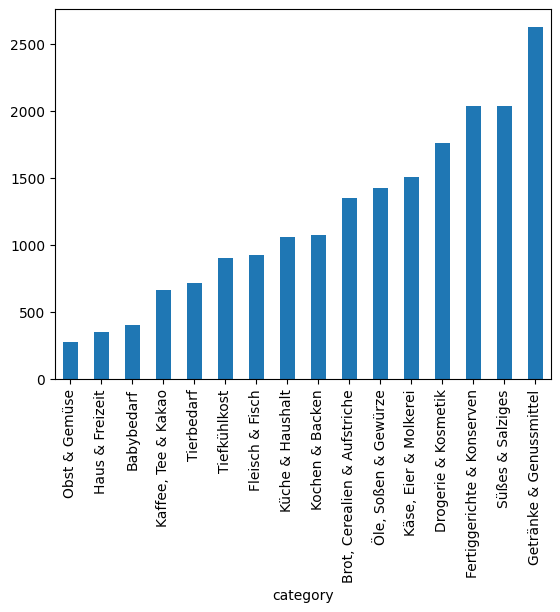

In [282]:
df_filtered.groupby('category').name.count().sort_values().plot(kind='bar')

In [283]:
category_weights = ((df_filtered.groupby('category').name.count().sort_values() / df_filtered.groupby('category').name.count().sort_values().sum())).rename('weight').reset_index()
category_weights.weight = (1- category_weights.weight)/15
category_weights.weight

0     0.065701
1     0.065439
2     0.065255
3     0.064355
4     0.064163
5     0.063518
6     0.063428
7     0.062978
8     0.062926
9     0.061953
10    0.061709
11    0.061409
12    0.060534
13    0.059572
14    0.059551
15    0.057511
Name: weight, dtype: float64

In [290]:
df_filtered.shape

(19121, 3)

In [320]:
df_weights = df_filtered.groupby('category').name.count().reset_index()
df_weights.rename({'name':'name_count'}, axis=1, inplace=True)
df_weights['ratio_category'] = 1/16
df_weights.eval('ratio_true = name_count/19121', inplace=True)
df_weights.eval('weight = ratio_category/ratio_true', inplace=True)
df_weights.weight = df_weights.weight/df_weights.weight.sum()
df_weights

,category,name_count,ratio_category,ratio_true,weight
0,Babybedarf,405,0.0625,0.021181,0.123960
1,"Brot, Cerealien & Aufstriche",1352,0.0625,0.070708,0.037133
2,Drogerie & Kosmetik,1759,0.0625,0.091993,0.028541
3,Fertiggerichte & Konserven,2035,0.0625,0.106427,0.024670
4,Fleisch & Fisch,929,0.0625,0.048585,0.054041
5,Getränke & Genussmittel,2626,0.0625,0.137336,0.019118
6,Haus & Freizeit,352,0.0625,0.018409,0.142624
7,"Kaffee, Tee & Kakao",663,0.0625,0.034674,0.075722
8,Kochen & Backen,1073,0.0625,0.056116,0.046788
9,"Käse, Eier & Molkerei",1508,0.0625,0.078866,0.033292


In [321]:
df_weights.eval('weight_product = ratio_true*weight')

,category,name_count,ratio_category,ratio_true,weight,weight_product
0,Babybedarf,405,0.0625,0.021181,0.123960,0.002626
1,"Brot, Cerealien & Aufstriche",1352,0.0625,0.070708,0.037133,0.002626
2,Drogerie & Kosmetik,1759,0.0625,0.091993,0.028541,0.002626
3,Fertiggerichte & Konserven,2035,0.0625,0.106427,0.024670,0.002626
4,Fleisch & Fisch,929,0.0625,0.048585,0.054041,0.002626
5,Getränke & Genussmittel,2626,0.0625,0.137336,0.019118,0.002626
6,Haus & Freizeit,352,0.0625,0.018409,0.142624,0.002626
7,"Kaffee, Tee & Kakao",663,0.0625,0.034674,0.075722,0.002626
8,Kochen & Backen,1073,0.0625,0.056116,0.046788,0.002626
9,"Käse, Eier & Molkerei",1508,0.0625,0.078866,0.033292,0.002626


In [337]:
df_filtered.columns

Index(['name', 'price', 'category'], dtype='object')

In [336]:
'''df_filtered.drop(['name_count_x', 'ratio_category_x',
       'ratio_true_x', 'weight_x', 'name_count_y', 'ratio_category_y',
       'ratio_true_y', 'weight_y'],axis=1, inplace=True)'''

In [338]:
df_filtered = pd.merge(df_filtered, df_weights, on='category')
df_filtered.drop(['name_count', 'ratio_category',
       'ratio_true'],axis=1, inplace=True)
df_filtered

,name,price,category,weight
0,Alete Abendbrei Bio Keksbrei 190g,1.29,Babybedarf,0.123960
1,Alete Abendmahlzeit zum Trinken Mehrkorn-Getre...,1.99,Babybedarf,0.123960
2,Alete Bio Apfel-Pfirsich mit Keks nach 4. Mona...,1.29,Babybedarf,0.123960
3,Alete Bio Banane-Apfel mit Vollkorn-Getreide 190g,1.29,Babybedarf,0.123960
4,Alete Bio Erbseneintopf 250g,1.59,Babybedarf,0.123960
...,...,...,...,...
19116,ja! Tafelsalz 500g,0.25,"Öle, Soßen & Gewürze",0.035305
19117,ja! Tomate-Basilikum Pasta-Sauce 400g,1.59,"Öle, Soßen & Gewürze",0.035305
19118,ja! Tomaten-Ketchup 500ml,1.79,"Öle, Soßen & Gewürze",0.035305
19119,ja! Tomatenmark 3-fach konzentriert 200g,1.09,"Öle, Soßen & Gewürze",0.035305


### Cleaned df

- No products that are in more than one category (-151)
- No duplicates (-7)
    - EAN numbers
    - Prices

## Generate embeddings

In [343]:
df_sample = df_filtered.sample(1000, weights='weight', random_state=42)
df_sample

,name,price,category,weight
9086,"ja! Mineralwasser Medium 0,5l",0.14,Getränke & Genussmittel,0.019118
17999,Gefro Salatwürze vegan 400g,7.99,"Öle, Soßen & Gewürze",0.035305
13957,REWE Bio Sprossen Trio 100g,1.49,Obst & Gemüse,0.181241
12066,Müller Grießpudding Erdbeere 160g,0.89,"Käse, Eier & Molkerei",0.033292
2629,NIVEA Men Creme 75ml,2.49,Drogerie & Kosmetik,0.028541
...,...,...,...,...
4876,Popp Weißkrautsalat in Dilldressing 400g,1.89,Fertiggerichte & Konserven,0.024670
1734,ja! Zaziki 200g,0.65,"Brot, Cerealien & Aufstriche",0.037133
804,Flora Nusscreme Brotaufstrich 350g,3.49,"Brot, Cerealien & Aufstriche",0.037133
13786,"Bio Kartoffeln vorwiegend festkochend 1,5kg",2.99,Obst & Gemüse,0.181241


In [344]:
df_sample.groupby('category').name.count().sort_values()

category
Kaffee, Tee & Kakao             50
Fertiggerichte & Konserven      54
Fleisch & Fisch                 55
Haus & Freizeit                 56
Obst & Gemüse                   56
Süßes & Salziges                57
Babybedarf                      59
Küche & Haushalt                59
Tiefkühlkost                    60
Öle, Soßen & Gewürze            64
Kochen & Backen                 67
Tierbedarf                      69
Getränke & Genussmittel         70
Käse, Eier & Molkerei           70
Brot, Cerealien & Aufstriche    77
Drogerie & Kosmetik             77
Name: name, dtype: int64

In [345]:
df_sample.name

9086                         ja! Mineralwasser Medium 0,5l
17999                          Gefro Salatwürze vegan 400g
13957                          REWE Bio Sprossen Trio 100g
12066                    Müller Grießpudding Erdbeere 160g
2629                                  NIVEA Men Creme 75ml
                               ...                        
4876              Popp Weißkrautsalat in Dilldressing 400g
1734                                       ja! Zaziki 200g
804                     Flora Nusscreme Brotaufstrich 350g
13786          Bio Kartoffeln vorwiegend festkochend 1,5kg
7470     Hohes C Antiox Water Cassis Minze Wasser mit G...
Name: name, Length: 1000, dtype: object

In [347]:
def get_embeddings_by_chunks(data, chunk_size):
    chunks = [data[x : x + chunk_size] for x in range(0, len(data), chunk_size)]
    embeddings_response = [
        client.embeddings(model="mistral-embed", input=c) for c in chunks
    ]
    return [d.embedding for e in embeddings_response for d in e.data]

df_sample["embeddings"] = get_embeddings_by_chunks(df_sample["name"].tolist(), 50)
df_sample




,name,price,category,weight,embeddings
9086,"ja! Mineralwasser Medium 0,5l",0.14,Getränke & Genussmittel,0.019118,"[-0.0212249755859375, -0.01141357421875, 0.045..."
17999,Gefro Salatwürze vegan 400g,7.99,"Öle, Soßen & Gewürze",0.035305,"[-0.02716064453125, 0.012176513671875, 0.04931..."
13957,REWE Bio Sprossen Trio 100g,1.49,Obst & Gemüse,0.181241,"[-0.0266876220703125, 0.0098724365234375, 0.03..."
12066,Müller Grießpudding Erdbeere 160g,0.89,"Käse, Eier & Molkerei",0.033292,"[-0.034393310546875, 0.0095367431640625, 0.041..."
2629,NIVEA Men Creme 75ml,2.49,Drogerie & Kosmetik,0.028541,"[-0.05255126953125, 0.0182647705078125, 0.0620..."
...,...,...,...,...,...
4876,Popp Weißkrautsalat in Dilldressing 400g,1.89,Fertiggerichte & Konserven,0.024670,"[-0.0203399658203125, -0.02130126953125, 0.051..."
1734,ja! Zaziki 200g,0.65,"Brot, Cerealien & Aufstriche",0.037133,"[-0.04034423828125, 0.0032215118408203125, 0.0..."
804,Flora Nusscreme Brotaufstrich 350g,3.49,"Brot, Cerealien & Aufstriche",0.037133,"[-0.01800537109375, -0.0034732818603515625, 0...."
13786,"Bio Kartoffeln vorwiegend festkochend 1,5kg",2.99,Obst & Gemüse,0.181241,"[-0.04327392578125, -0.00699615478515625, 0.05..."


### Visualize embeddings

In [22]:
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

#sns.set(color_palette=)
tsne = TSNE(n_components=2, random_state=0).fit_transform(np.array(df_sample['embeddings'].to_list()))


In [356]:
tsne.shape

(1000, 2)

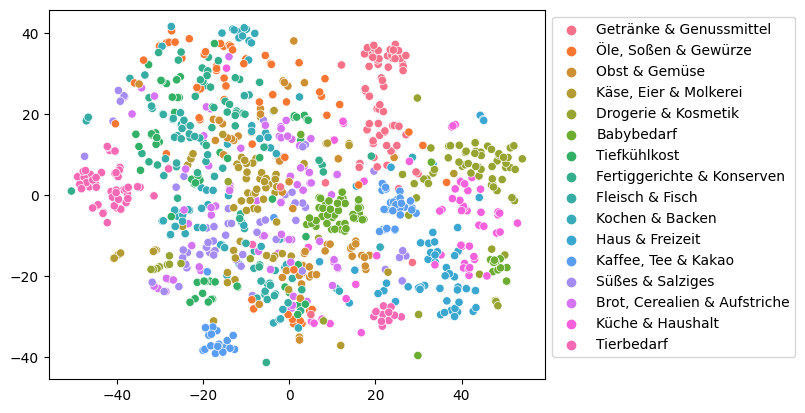

In [358]:
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df_sample['category'].to_list()))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

### Create embeddings with added context

In [373]:
#df_sample.drop(['weight'], axis=1).to_csv('../data/name_embeds_sample_1k_no_context.csv')

In [367]:
df_sample.drop(['context','name_in_context'], axis=1, inplace=True)

In [374]:
df_sample['context'] = ' supermarkt produktbezeichnung'
df_sample['name_in_context'] = df_sample.eval("name + context")
df_sample

,name,price,category,weight,embeddings,context,name_in_context
9086,"ja! Mineralwasser Medium 0,5l",0.14,Getränke & Genussmittel,0.019118,"[-0.0212249755859375, -0.01141357421875, 0.045...",supermarkt produktbezeichnung,"ja! Mineralwasser Medium 0,5l supermarkt produ..."
17999,Gefro Salatwürze vegan 400g,7.99,"Öle, Soßen & Gewürze",0.035305,"[-0.02716064453125, 0.012176513671875, 0.04931...",supermarkt produktbezeichnung,Gefro Salatwürze vegan 400g supermarkt produkt...
13957,REWE Bio Sprossen Trio 100g,1.49,Obst & Gemüse,0.181241,"[-0.0266876220703125, 0.0098724365234375, 0.03...",supermarkt produktbezeichnung,REWE Bio Sprossen Trio 100g supermarkt produkt...
12066,Müller Grießpudding Erdbeere 160g,0.89,"Käse, Eier & Molkerei",0.033292,"[-0.034393310546875, 0.0095367431640625, 0.041...",supermarkt produktbezeichnung,Müller Grießpudding Erdbeere 160g supermarkt p...
2629,NIVEA Men Creme 75ml,2.49,Drogerie & Kosmetik,0.028541,"[-0.05255126953125, 0.0182647705078125, 0.0620...",supermarkt produktbezeichnung,NIVEA Men Creme 75ml supermarkt produktbezeich...
...,...,...,...,...,...,...,...
4876,Popp Weißkrautsalat in Dilldressing 400g,1.89,Fertiggerichte & Konserven,0.024670,"[-0.0203399658203125, -0.02130126953125, 0.051...",supermarkt produktbezeichnung,Popp Weißkrautsalat in Dilldressing 400g super...
1734,ja! Zaziki 200g,0.65,"Brot, Cerealien & Aufstriche",0.037133,"[-0.04034423828125, 0.0032215118408203125, 0.0...",supermarkt produktbezeichnung,ja! Zaziki 200g supermarkt produktbezeichnung
804,Flora Nusscreme Brotaufstrich 350g,3.49,"Brot, Cerealien & Aufstriche",0.037133,"[-0.01800537109375, -0.0034732818603515625, 0....",supermarkt produktbezeichnung,Flora Nusscreme Brotaufstrich 350g supermarkt ...
13786,"Bio Kartoffeln vorwiegend festkochend 1,5kg",2.99,Obst & Gemüse,0.181241,"[-0.04327392578125, -0.00699615478515625, 0.05...",supermarkt produktbezeichnung,"Bio Kartoffeln vorwiegend festkochend 1,5kg su..."


In [375]:
def get_embeddings_by_chunks(data, chunk_size):
    chunks = [data[x : x + chunk_size] for x in range(0, len(data), chunk_size)]
    embeddings_response = [
        client.embeddings(model="mistral-embed", input=c) for c in chunks
    ]
    return [d.embedding for e in embeddings_response for d in e.data]

df_sample["embeddings_context"] = get_embeddings_by_chunks(df_sample["name_in_context"].tolist(), 50)
df_sample


,name,price,category,weight,embeddings,context,name_in_context,embeddings_context
9086,"ja! Mineralwasser Medium 0,5l",0.14,Getränke & Genussmittel,0.019118,"[-0.0212249755859375, -0.01141357421875, 0.045...",supermarkt produktbezeichnung,"ja! Mineralwasser Medium 0,5l supermarkt produ...","[-0.025360107421875, -0.0135498046875, 0.04922..."
17999,Gefro Salatwürze vegan 400g,7.99,"Öle, Soßen & Gewürze",0.035305,"[-0.02716064453125, 0.012176513671875, 0.04931...",supermarkt produktbezeichnung,Gefro Salatwürze vegan 400g supermarkt produkt...,"[-0.026702880859375, 0.0124664306640625, 0.056..."
13957,REWE Bio Sprossen Trio 100g,1.49,Obst & Gemüse,0.181241,"[-0.0266876220703125, 0.0098724365234375, 0.03...",supermarkt produktbezeichnung,REWE Bio Sprossen Trio 100g supermarkt produkt...,"[-0.029632568359375, 0.0100555419921875, 0.037..."
12066,Müller Grießpudding Erdbeere 160g,0.89,"Käse, Eier & Molkerei",0.033292,"[-0.034393310546875, 0.0095367431640625, 0.041...",supermarkt produktbezeichnung,Müller Grießpudding Erdbeere 160g supermarkt p...,"[-0.032928466796875, 0.00975799560546875, 0.05..."
2629,NIVEA Men Creme 75ml,2.49,Drogerie & Kosmetik,0.028541,"[-0.05255126953125, 0.0182647705078125, 0.0620...",supermarkt produktbezeichnung,NIVEA Men Creme 75ml supermarkt produktbezeich...,"[-0.047271728515625, 0.0156402587890625, 0.064..."
...,...,...,...,...,...,...,...,...
4876,Popp Weißkrautsalat in Dilldressing 400g,1.89,Fertiggerichte & Konserven,0.024670,"[-0.0203399658203125, -0.02130126953125, 0.051...",supermarkt produktbezeichnung,Popp Weißkrautsalat in Dilldressing 400g super...,"[-0.0178680419921875, -0.01029205322265625, 0...."
1734,ja! Zaziki 200g,0.65,"Brot, Cerealien & Aufstriche",0.037133,"[-0.04034423828125, 0.0032215118408203125, 0.0...",supermarkt produktbezeichnung,ja! Zaziki 200g supermarkt produktbezeichnung,"[-0.036651611328125, 0.003902435302734375, 0.0..."
804,Flora Nusscreme Brotaufstrich 350g,3.49,"Brot, Cerealien & Aufstriche",0.037133,"[-0.01800537109375, -0.0034732818603515625, 0....",supermarkt produktbezeichnung,Flora Nusscreme Brotaufstrich 350g supermarkt ...,"[-0.0196533203125, -0.002773284912109375, 0.05..."
13786,"Bio Kartoffeln vorwiegend festkochend 1,5kg",2.99,Obst & Gemüse,0.181241,"[-0.04327392578125, -0.00699615478515625, 0.05...",supermarkt produktbezeichnung,"Bio Kartoffeln vorwiegend festkochend 1,5kg su...","[-0.037139892578125, 0.002544403076171875, 0.0..."


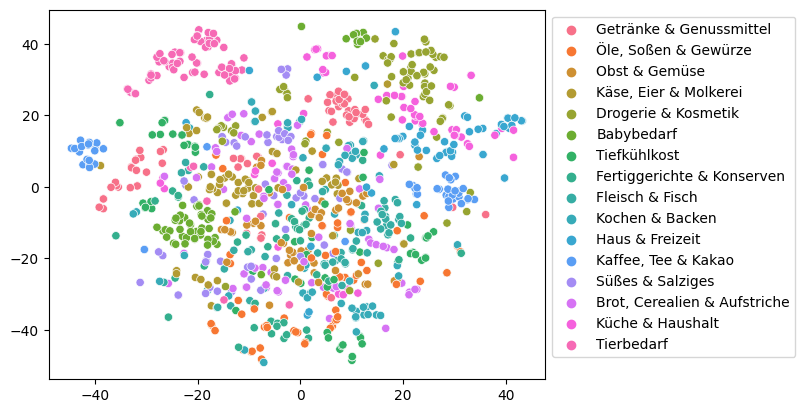

In [376]:
tsne = TSNE(n_components=2, random_state=0).fit_transform(np.array(df_sample['embeddings_context'].to_list()))
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df_sample['category'].to_list()))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

# Make embeddings for complete dataset

In [19]:
def get_embeddings_by_chunks(data, chunk_size):
    chunks = [data[x : x + chunk_size] for x in range(0, len(data), chunk_size)]
    embeddings_response = [
        client.embeddings(model="mistral-embed", input=c) for c in chunks
    ]
    return [d.embedding for e in embeddings_response for d in e.data]

df_filtered["embeddings"] = get_embeddings_by_chunks(df_filtered["name"].tolist(), 50)
df_filtered

,name,price,category,embeddings
0,Alete Abendbrei Bio Keksbrei 190g,1.29,Babybedarf,"[-0.047637939453125, 0.006134033203125, 0.0454..."
1,Alete Abendmahlzeit zum Trinken Mehrkorn-Getre...,1.99,Babybedarf,"[-0.033355712890625, 0.0202789306640625, 0.022..."
2,Alete Bio Apfel-Pfirsich mit Keks nach 4. Mona...,1.29,Babybedarf,"[-0.05810546875, 0.0166778564453125, 0.0557556..."
3,Alete Bio Banane-Apfel mit Vollkorn-Getreide 190g,1.29,Babybedarf,"[-0.0217742919921875, 0.0098724365234375, 0.04..."
4,Alete Bio Erbseneintopf 250g,1.59,Babybedarf,"[-0.03509521484375, 0.01074981689453125, 0.061..."
...,...,...,...,...
19116,ja! Tafelsalz 500g,0.25,"Öle, Soßen & Gewürze","[-0.025177001953125, 0.0115814208984375, 0.045..."
19117,ja! Tomate-Basilikum Pasta-Sauce 400g,1.59,"Öle, Soßen & Gewürze","[-0.0157318115234375, 0.0177764892578125, 0.03..."
19118,ja! Tomaten-Ketchup 500ml,1.79,"Öle, Soßen & Gewürze","[-0.015594482421875, 0.01385498046875, 0.04638..."
19119,ja! Tomatenmark 3-fach konzentriert 200g,1.09,"Öle, Soßen & Gewürze","[-0.01306915283203125, 0.0239410400390625, 0.0..."


In [20]:
df_filtered.to_csv('../data/name_embeds_complete_no_context.csv')

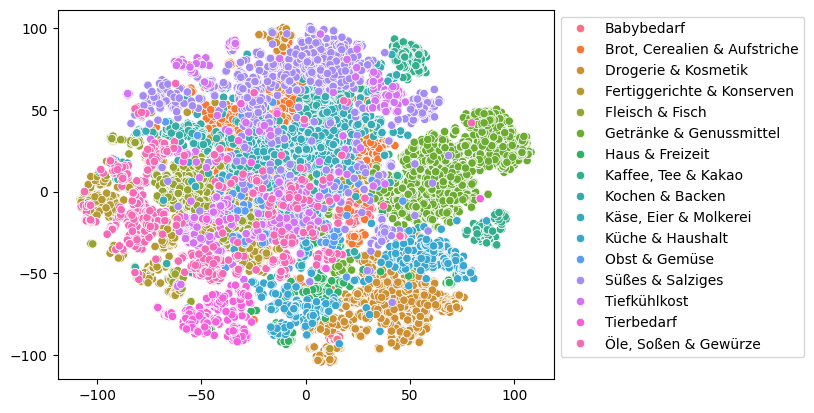

In [23]:
tsne = TSNE(n_components=2, random_state=0).fit_transform(np.array(df_filtered['embeddings'].to_list()))
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df_filtered['category'].to_list()))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

In [24]:
import matplotlib.pyplot as plt

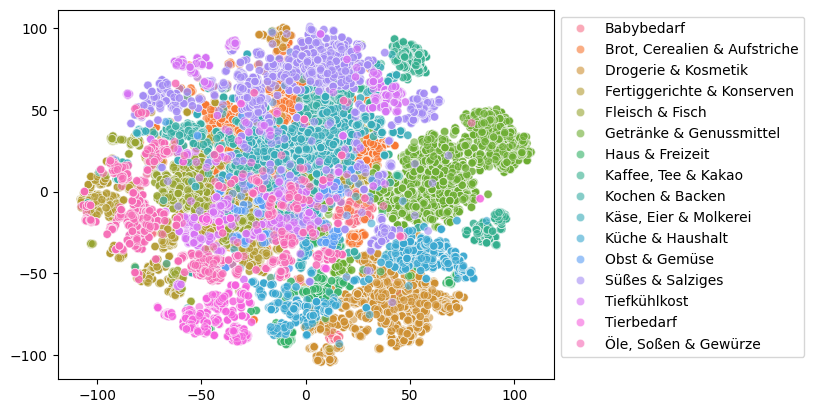

In [29]:
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df_filtered['category'].to_list()),alpha=.6)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.savefig('product_cluster.png',dpi=300,bbox_inches='tight')